In [1]:
SAVED_RESULTS_DIR = "./out"

# Import funman related code
import os
from funman.api.run import Runner
from funman_demo import summarize_results
from funman_demo.example.pde import plot_spatial_timeseries
from IPython.display import HTML
import matplotlib.pyplot as plt
import itertools
from funman import FunmanWorkRequest, EncodingSchedule, POS_INFINITY

import json
from funman.representation.constraint import LinearConstraint, ParameterConstraint, StateVariableConstraint
from funman.representation import Interval
from funman import FUNMANConfig
import logging
from funman_demo import summarize_results



RESOURCES = "../../../resources"

EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "evaluation")
EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "evaluation")
MODEL_PATH = os.path.join(
    EXAMPLE_DIR,"sidarthe.json"
)


[0.69963, 0.69963) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.04700, 0.04700) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.04560, 0.04560) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.10000, 0.10000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00011, 0.00011) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.03000, 0.03000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01250, 0.01250) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01250, 0.01250) has equal lower and upper bounds, so assuming the upper bound is

Total # of ibex-fwdbwd Pruning                @ Pruning level        =            4284
Total # of ibex-fwdbwd Pruning (zero-effect)  @ Pruning level        =            3706
Total time spent in Pruning                   @ Pruning level        =        0.007446 sec
Total time spent in making constraints        @ Pruning level        =        0.000000 sec
Total # of Convert                            @ Ibex Converter       =             204
Total time spent in Converting                @ Ibex Converter       =        0.005841 sec


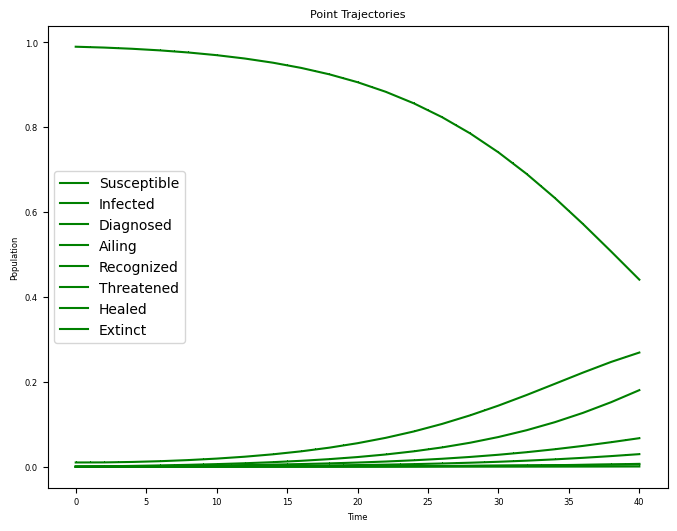

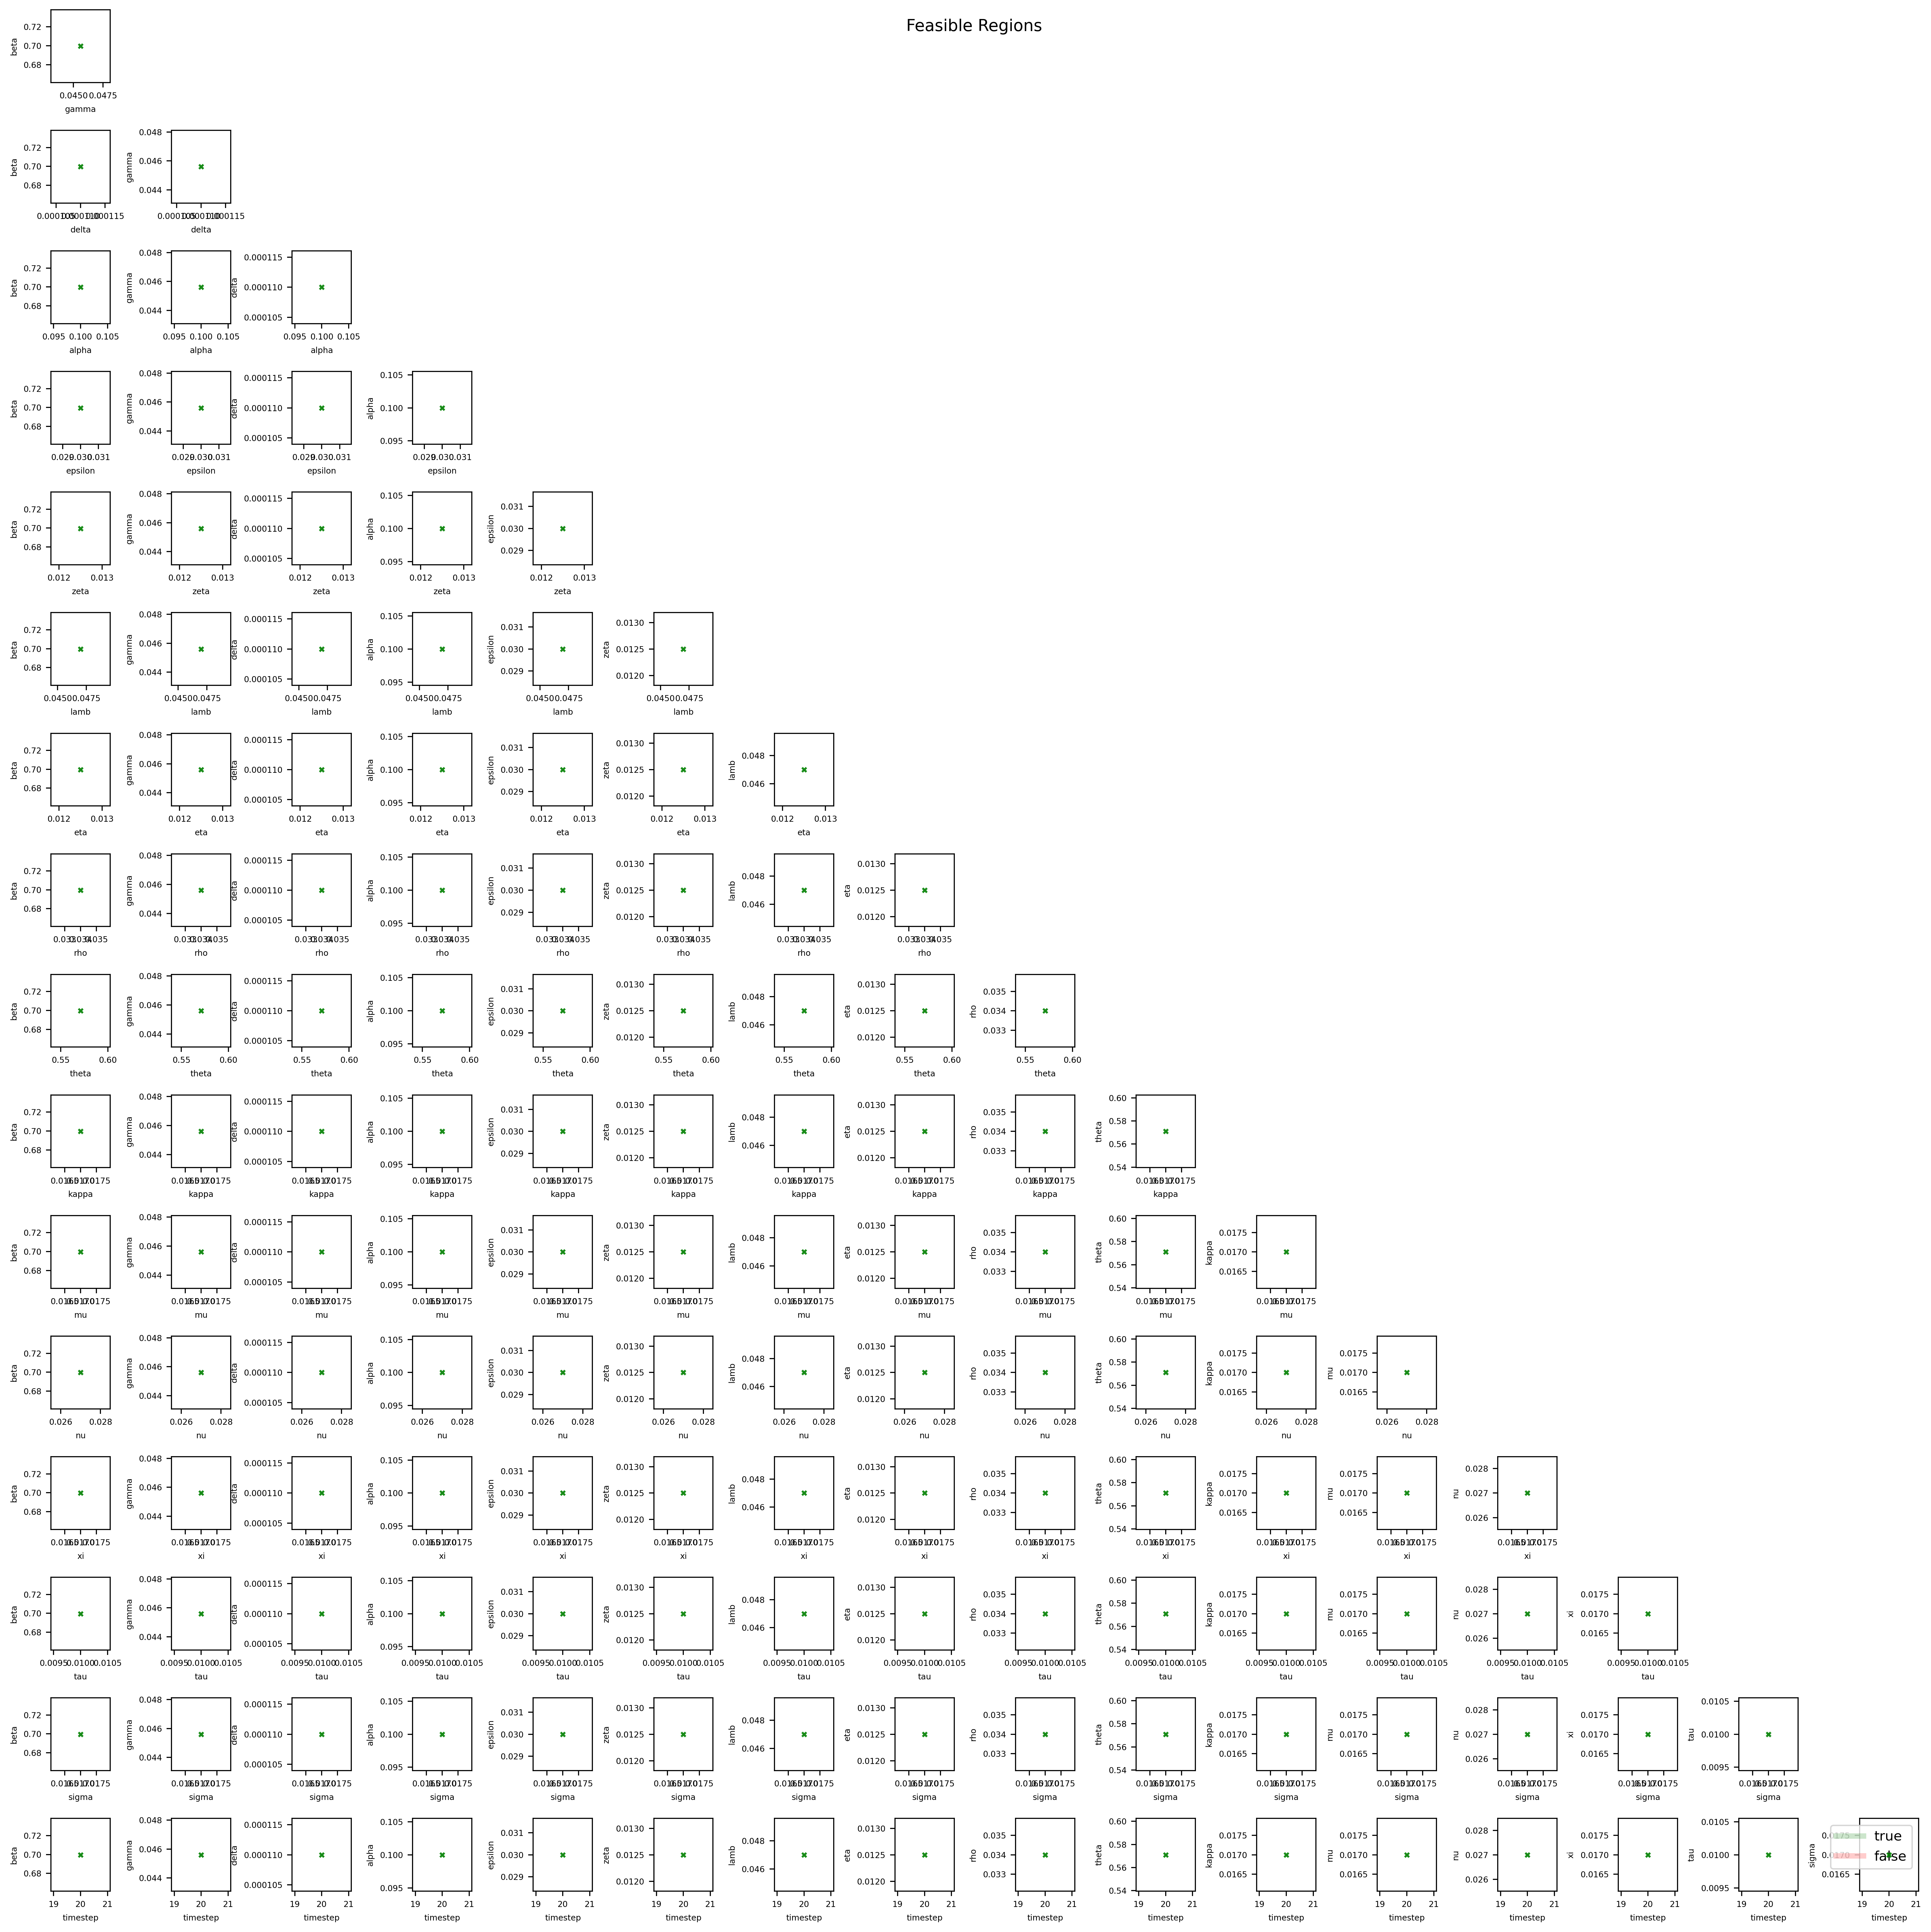

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
Parameters = {beta[0.6996340000000001, 0.6996340000000001): 0.6996340000000001, lamb[0.047, 0.047): 0.047, gamma[0.0456, 0.0456): 0.0456, alpha[0.1, 0.1): 0.1, delta[0.00011, 0.00011): 0.00011, epsilon[0.030000000000000002, 0.030000000000000002): 0.030000000000000002, zeta[0.0125, 0.0125): 0.0125, eta[0.0125, 0.0125): 0.0125, rho[0.034, 0.034): 0.034, theta[0.5710000000000001, 0.5710000000000001): 0.5710000000000001, kappa[0.017, 0.017): 0.017, mu[0.017, 0.017): 0.017, nu[0.027000000000000003, 0.027000000000000003): 0.027000000000000003, xi[0.017, 0.017): 0.017, tau[0.01, 0.01): 0.01, sigma[0.017, 0.017): 0.017}
        # {beta[0.6996340000000001, 0.6996340000000001): 0.6996340000000001, l

In [3]:
# Consistency M3.3

STATES = ["Susceptible", "Infected","Diagnosed",  "Ailing", "Recognized","Threatened", "Healed",  "Extinct"]

COMPARTMENTS = STATES
MAX_TIME=40
STEP_SIZE=2
to_synthesize=[]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sidarthe_request_consistency.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Consistency",
            case_out_dir=SAVED_RESULTS_DIR,
            dump_results=False
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

In [4]:
# Parameterization (M3.3)

STATES = ["Susceptible", "Infected","Diagnosed",  "Ailing", "Recognized","Threatened", "Healed",  "Extinct"]
COMPARTMENTS = STATES
MAX_TIME=40
STEP_SIZE=2
to_synthesize=[]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sidarthe_request_parameterization.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    # funman_request.config.dreal_precision = 1e-3
    # funman_request.config.use_compartmental_constraints = False

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIDARTHE Parameterization",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

[0.04560, 0.04560) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.10000, 0.10000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00011, 0.00011) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.03000, 0.03000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01250, 0.01250) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01250, 0.01250) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.03400, 0.03400) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.57100, 0.57100) has equal lower and upper bounds, so assuming the upper bound is

In [ ]:
from funman import FunmanResults
import json
import pandas as pd
from datetime import datetime
# Load FUNMAN output and plot the progress data
# data = results_unconstrained_point
with open("out/c633ce05-39ea-4c99-80c8-7d21163a22a9.json", "r") as f:
    data = FunmanResults.model_validate(json.loads(f.read()))
df = pd.DataFrame.from_records(data.timing.progress_timeseries, columns=["time", "progress"])
df.time = pd.to_datetime(df.time)
df.plot.scatter(x="time", y="progress")

In [ ]:
# Parameter Synthesis

STATES = ["Susceptible", "Infected","Diagnosed",  "Ailing", "Recognized","Threatened", "Healed",  "Extinct"]

COMPARTMENTS = STATES
MAX_TIME=40
STEP_SIZE=4
to_synthesize=["beta", "gamma"]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sir_request_param_synth.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    # funman_request.parameter("gamma").interval.lb = 0.025
    # funman_request.parameter("gamma").interval.ub = 0.03
    # funman_request.parameter("beta").interval.lb = 0.13
    # funman_request.parameter("beta").interval.ub = 0.16

    # funman_request.config.substitute_subformulas = True
    # funman_request.config.taylor_series_order = 4
    # series_approximation_threshold = 1e-8
    # funman_request.config.verbosity = 20
    funman_request.config.tolerance = 1e-1
    funman_request.config.compartmental_constraint_noise = 1e-10
    # funman_request.config.solver_timeout = 20
    # funman_request.config.uniform_box_splits = True
    # funman_request.config.num_initial_boxes = 1
    funman_request.config.dreal_precision = 1e-1

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Parameter Synthesis",
            case_out_dir=SAVED_RESULTS_DIR,
            dump_plot=True,
            parameters_to_plot=to_synthesize+["timestep"]
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", parameters_to_plot=to_synthesize+["timestep"], synthesized_parameters=to_synthesize+["timestep"])
    print(summary)